<a href="https://colab.research.google.com/github/mokshManchandani/data-science/blob/deeplearning-pytorch-udemy/GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

# GD in 1D

In [3]:
def f(x):
  return 3 * x ** 2 - 3 * x + 4

def derv(x):
  return 6 * x - 3


In [4]:
def get_data(): return np.linspace(-2,2,2001)

In [5]:
def plot_data_vs_derv(x, f_, derv_):
  plt.plot(x, f_(x), x, derv_(x))
  plt.xlim(x[[0, -1]])
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('f(x) / dy/d(x)')
  plt.legend(['f(x)', 'dy/d(x)'])
  plt.show()

In [6]:
def perform_gd(x, derv_, learning_rate = 0.01,epochs = 100,has_default=False):
  # get a local minima
  local_minima = 0 if has_default else np.random.choice(x, 1)
  print(f"starting with initial value of {local_minima}")
  for step in range(epochs):
    local_minima = local_minima - learning_rate * derv_(local_minima)
  print(f"after {epochs} steps got the value of {local_minima}")
  return local_minima

In [7]:
def perform_gd_with_intermediate_steps(x, derv_,learning_rate = 0.01, epochs = 100, has_default=False):
  # get a local minima
  local_minima = 0 if has_default else np.random.choice(x, 1)
  print(f"starting with initial value of {local_minima}")
  model_params = np.zeros((epochs, 2))

  for step in range(epochs):
    grad = derv_(local_minima)
    local_minima = local_minima - learning_rate * grad
    model_params[step, 0] = local_minima[0] if isinstance(local_minima, np.ndarray) else local_minima
    model_params[step, 1] = grad[0]if isinstance(grad, np.ndarray) else grad
  if isinstance(local_minima, np.ndarray):
    local_minima = local_minima[0]
  print(f"after {epochs} steps got the value of {local_minima:.2f}")
  return model_params

In [8]:
def plot_gd_results(x, f_, derv_, localminima):
  plt.plot(x, f_(x), x, derv_(x))
  plt.plot(localminima, f_(localminima), 'ro')
  plt.plot(localminima, derv_(localminima), 'ro')
  plt.xlim(x[[0, -1]])
  plt.grid()
  plt.xlabel('x')
  plt.ylabel('f(x) / dy/d(x)')
  plt.legend(['f(x)', 'dy/d(x)', 'local minima'])
  plt.show()

In [9]:
def plot_gd_results_with_intermediate_steps(model_params):
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))
  axs[0].plot(model_params[:,0],'o-')
  axs[0].set_xlabel('Step')
  axs[0].set_ylabel('Local Minima')
  axs[0].grid()
  axs[1].plot(model_params[:,1],'o-')
  axs[1].set_xlabel('Step')
  axs[1].set_ylabel('Gradient')
  axs[1].grid()

In [10]:
x = get_data()

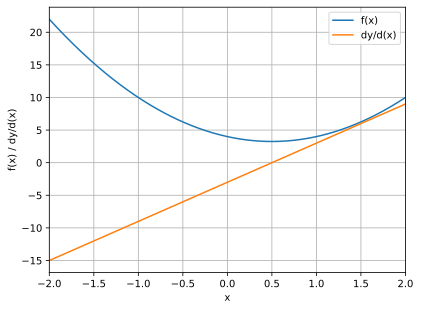

In [11]:
plot_data_vs_derv(x,f,derv)

starting with initial value of [-1.318]
after 100 steps got the value of [0.49626424]


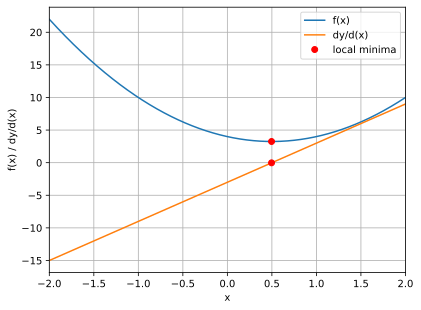

In [12]:
plot_gd_results(x,f, derv, perform_gd(x,derv))

starting with initial value of [-1.102]
after 100 steps got the value of 0.50


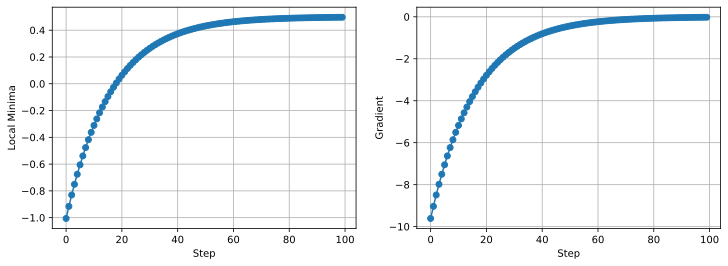

In [13]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv))

starting with initial value of [0.238]
after 100 steps got the value of -2066815571679052345358049682440791852471048271850594779183740104998912.00


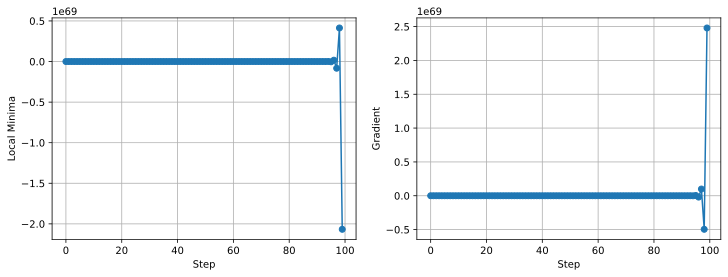

In [14]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv,learning_rate=1))

starting with initial value of [-0.136]
after 100 steps got the value of [-5.01715536e+69]


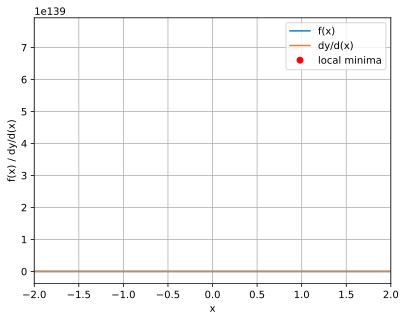

In [15]:
plot_gd_results(x,f, derv, perform_gd(x,derv,learning_rate=1))

starting with initial value of [0.27]
after 100 steps got the value of 0.37


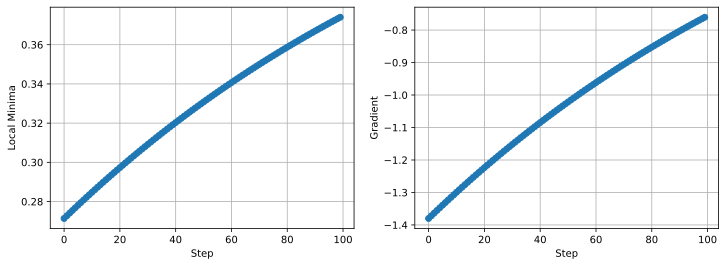

In [16]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv,learning_rate=.001))

starting with initial value of [-0.47]
after 100 steps got the value of [-0.03138608]


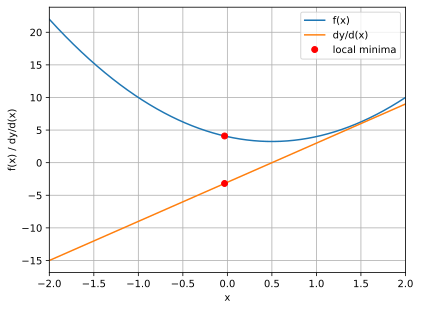

In [17]:
plot_gd_results(x,f, derv, perform_gd(x,derv,learning_rate=.001))

starting with initial value of [-0.492]
after 1000 steps got the value of 0.50


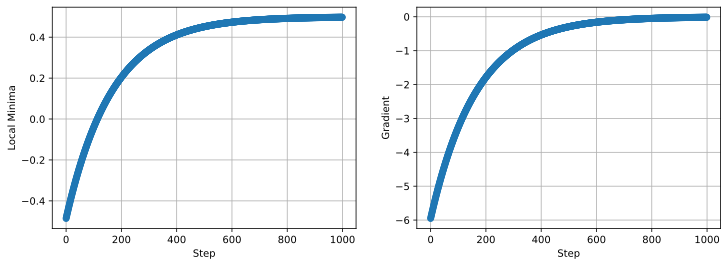

In [18]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x,derv,learning_rate=.001, epochs=1000))

starting with initial value of [0.952]
after 1000 steps got the value of [0.50110033]


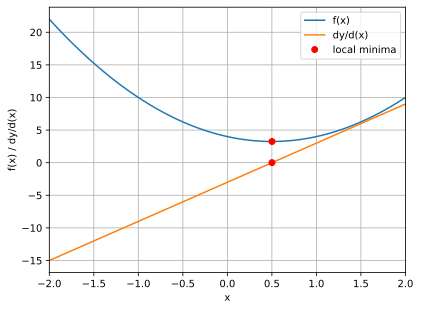

In [19]:
plot_gd_results(x,f, derv, perform_gd(x,derv,learning_rate=.001, epochs=1000))

# Code Challenge GD in 1D

differentiate the function :

```python
f(x) = cos(2 * math.pi * x) + x**2
```

use a constant starting value : ```x = 0```


In [20]:
x_symbol = sp.symbols('x')

In [21]:
f_x = sp.cos(2 * sp.pi * x_symbol) + x_symbol ** 2

In [22]:
sp.diff(f_x)

2*x - 2*pi*sin(2*pi*x)

In [23]:
def f(x):
  return np.cos(2 * np.pi * x) + x ** 2

def derv(x):
  return 2 * x - 2 * np.pi * np.sin(2 * np.pi * x)

In [24]:
x = get_data()

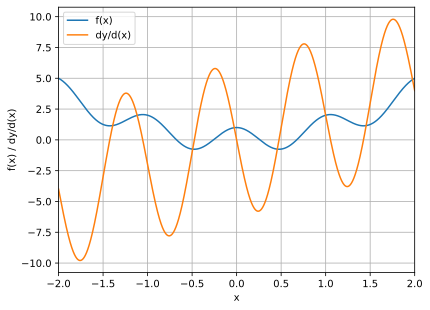

In [25]:
plot_data_vs_derv(x, f, derv)

starting with initial value of 0
after 100 steps got the value of 0.0


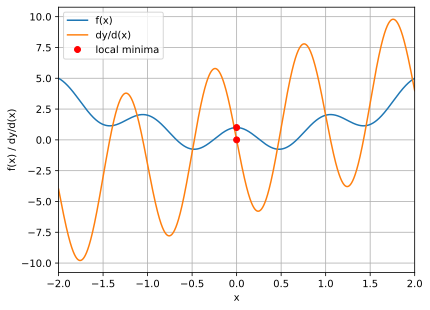

In [26]:
plot_gd_results(x, f, derv, perform_gd(x, derv, has_default=True))

starting with initial value of [1.906]
after 500 steps got the value of [1.42506742]


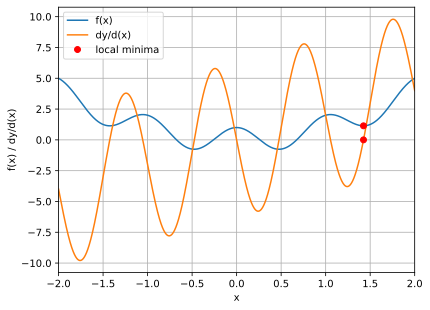

In [27]:
plot_gd_results(x, f, derv, perform_gd(x, derv, learning_rate=0.001,epochs=500,has_default=False))

starting with initial value of [1.33]
after 500 steps got the value of 1.43


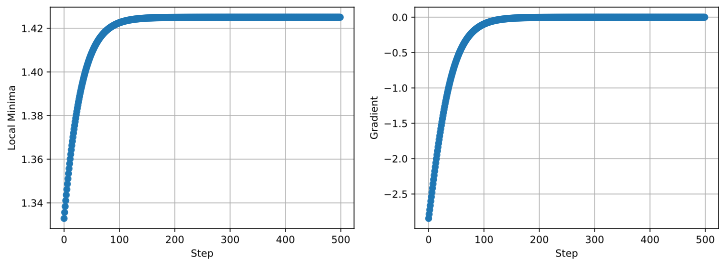

In [28]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x, derv, learning_rate=0.001, epochs=500,has_default=False))

starting with initial value of 0
after 100 steps got the value of 0.00


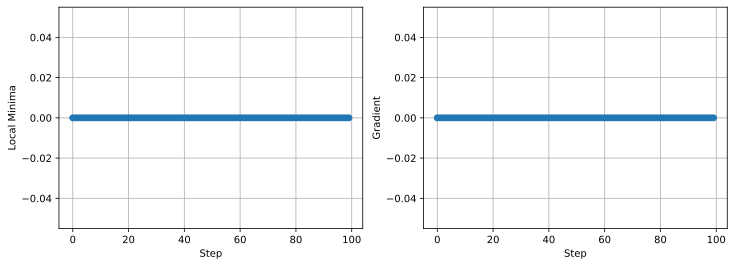

In [29]:
plot_gd_results_with_intermediate_steps(perform_gd_with_intermediate_steps(x, derv, has_default=True))

# GD in 2D

In [30]:
def peaks(x, y):
  x, y = np.meshgrid(x, y)
  z = 3 * (1-x) ** 2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - 1/3 * np.exp(-(x + 1)**2 - y **2)
  return z

In [31]:
def get_x_y(): return np.linspace(-3,3,201),np.linspace(-3,3,201)

In [32]:
def plot_peaks(x, y, Z):
  plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
  plt.show()

In [33]:
def get_derv(x, y):
  sx, sy = sp.symbols('sx, sy')
  sZ = 3 * (1 - sx) ** 2 * sp.exp(-(sx ** 2) - (sy + 1)**2) - 10 * (sx/5 - sx ** 3 - sy ** 5) * sp.exp(-sx**2 - sy**2) - 1/3 * sp.exp(-(sx + 1)**2 - sy **2)

  df_x = sp.lambdify((sx, sy), sp.diff(sZ, sx), 'sympy')
  df_y = sp.lambdify((sx, sy), sp.diff(sZ, sy), 'sympy')
  return df_x, df_y

In [34]:
def plot_2d_gd(x, y, z, grad_x, grad_y, learning_rate=.01, epochs = 1000,has_default = False):
  # some random point to start with
  local_min = np.random.rand(2) * 4 - 2 if not has_default else np.array([0, 1.4])
  start_pnt = local_min[:]
  trajectory = np.zeros((epochs, 2))

  for step in range(epochs):
    grad = np.array([grad_x(local_min[0], local_min[1]).evalf(), grad_y(local_min[0], local_min[1]).evalf()])
    local_min = local_min - learning_rate * grad
    trajectory[step, :] = local_min
  plt.imshow(z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
  plt.plot(start_pnt[0], start_pnt[1], 'bs')
  plt.plot(local_min[0], local_min[1], 'ro')
  plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
  plt.legend(['start point', 'local minima', 'trajectory'])
  plt.colorbar()
  plt.show()

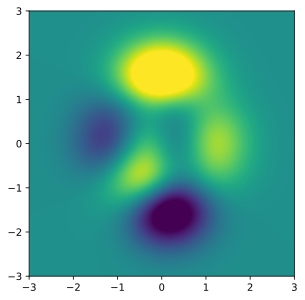

In [35]:
x, y = get_x_y()
Z = peaks(x, y)
plot_peaks(x, y, Z)

In [36]:
df_x, df_y = get_derv(x, y)

In [37]:
df_x(1,1).evalf()

-1.07369833656079

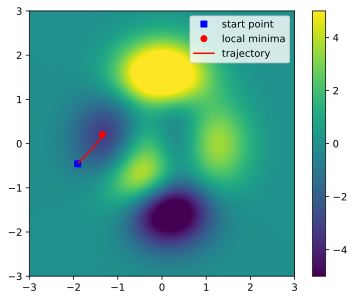

In [38]:
x,y = get_x_y()
Z = peaks(x, y)
df_x, df_y = get_derv(x, y)
plot_2d_gd(x, y, Z, df_x, df_y)

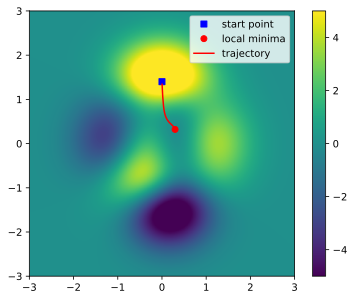

In [39]:
plot_2d_gd(x, y, Z, df_x, df_y, has_default=True)

# Code Challenge : 2D - gradient **ASCENT**

instead of finding the ***min*** find the ***max***


1. one way can be to do a addition in place of minus :

```
local_min = local_min + learning_rate * grad
```

2. other can be negate the function space it self this preserves the algorithm but this solution is less intutive.



In [40]:
def plot_2d_ga(x, y, Z, grad_x, grad_y, learning_rate = .01, epochs = 1000, has_default = False, do_sum = False):
  local_min = np.random.rand(2) * 4 - 2 if not has_default else np.array([0, 1.4])
  start_pnt = local_min[:]
  trajectory = np.zeros((epochs, 2))

  for step in range(epochs):
    grad = np.array([grad_x(local_min[0], local_min[1]).evalf(), grad_y(local_min[0], local_min[1]).evalf()])
    if do_sum:
      local_min = local_min + (learning_rate * grad)
    else:
      local_min = local_min - (learning_rate * grad)
    trajectory[step, :] = local_min
  plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
  plt.plot(start_pnt[0], start_pnt[1], 'bs')
  plt.plot(local_min[0], local_min[1], 'ro')
  plt.plot(trajectory[:, 0], trajectory[:, 1], 'r')
  plt.legend(['start point', 'local minima', 'trajectory'])
  plt.colorbar()
  plt.show()

In [41]:
x, y = get_x_y()
Z = peaks(x, y)
df_x, df_y = get_derv(x, y)

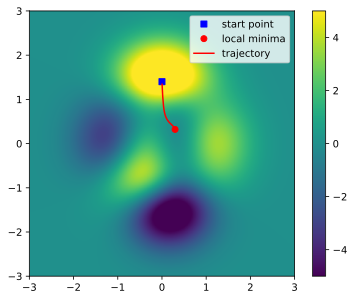

In [42]:
# do the normal descent
plot_2d_gd(x, y, Z, df_x, df_y, has_default=True)

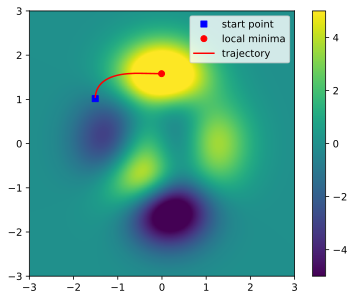

In [43]:
# do do-sum
plot_2d_ga(x, y, Z, df_x, df_y, do_sum=True)

# Prameteric Experiments on GD


1. single value experiments
  * systematically change the starting point of the guess
  * systematically change the learning rate

2. Two variable experiments
 * change both the learning rate and training epochs

In [45]:
sx = sp.symbols('sx')
sfx = sp.sin(sx) * sp.exp(-sx ** 2 * .05)
sdf_x = sp.diff(sfx)
sdf_x

-0.1*sx*exp(-0.05*sx**2)*sin(sx) + exp(-0.05*sx**2)*cos(sx)

In [46]:
def get_data(): return np.linspace(-2 * np.pi, 2 * np.pi, 401)

In [47]:
def f(x):
  return np.sin(x) * np.exp(-x ** 2 * .05)

In [48]:
def derv(x):
  return np.cos(x) * np.exp(-x ** 2 * .05) + (-.01 * x)*np.exp(-x ** 2 * 0.05) * np.sin(x)

In [84]:
def run_and_plot_experiment_with_varying_startpoints(x, f_, derv_, learning_rate = 0.01, epochs = 1000):
  startlocs = np.linspace(-5, 5, 50)
  finalres = np.zeros(len(startlocs))

  for idx, localmin in enumerate(startlocs):

    for step in range(epochs):
      grad = derv_(localmin)
      localmin = localmin - learning_rate * grad
    finalres[idx] = localmin
  plt.plot(startlocs, finalres, 's-')
  plt.xlabel('Starting Location')
  plt.ylabel('Final Location')
  plt.grid()
  plt.show()



In [94]:
def run_and_plot_experiment_with_varying_learning_rates(x, f, derv_, epochs = 1000):
  learning_rates = np.linspace(1e-10, 1e-1, 50)
  finalres = np.zeros(len(learning_rates))

  for idx, learning_rate in enumerate(learning_rates):
    localmin = 0
    for step in range(epochs):
      grad = derv_(localmin)
      localmin = localmin - learning_rate * grad
    finalres[idx] = localmin
  plt.plot(learning_rates, finalres, 's-')
  plt.xlabel('Learning Rate')
  plt.ylabel('Final Location')
  plt.grid()
  plt.show()


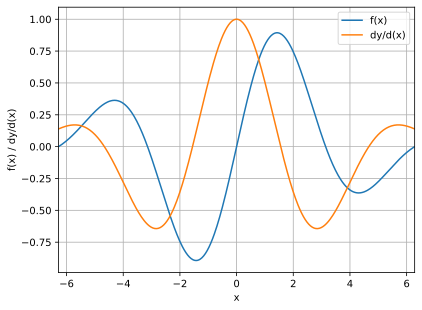

In [49]:
plot_data_vs_derv(get_data(), f, derv)

starting with initial value of [-1.5393804]
after 1000 steps got the value of [-1.54877493]


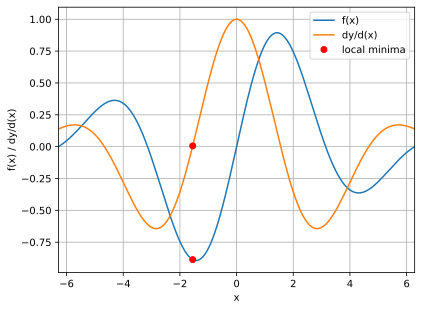

In [71]:
x = get_data()
plot_gd_results(x, f, derv, perform_gd(x, derv, learning_rate=0.001, epochs=1000))

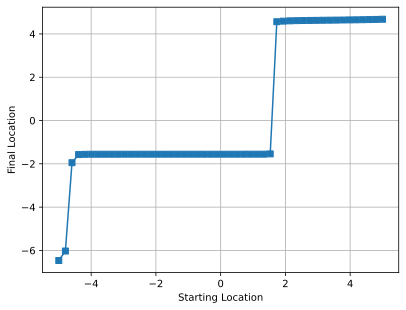

In [85]:
# change / vary the starting location
run_and_plot_experiment_with_varying_startpoints(x, f, derv)

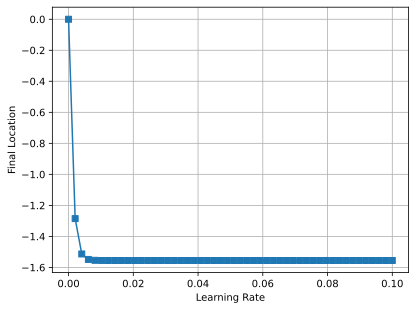

In [95]:
run_and_plot_experiment_with_varying_learning_rates(x, f, derv)